In [78]:
import scanpy as sc
import skimage as ski
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm


In [3]:
adata = sc.read_h5ad("bone_marrow_mononuc_luecken.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

In [5]:
adata.obs

,sample
AAACCCAAGGATGGCT-1,s1d1
AAACCCAAGGCCTAGA-1,s1d1
AAACCCAAGTGAGTGC-1,s1d1
AAACCCACAAGAGGCT-1,s1d1
AAACCCACATCGTGGC-1,s1d1
...,...
TTTGTTGAGAGTCTGG-1,s1d3
TTTGTTGCAGACAATA-1,s1d3
TTTGTTGCATGTTACG-1,s1d3
TTTGTTGGTAGTCACT-1,s1d3


In [6]:
type(adata.obs)

pandas.core.frame.DataFrame

In [7]:
type(adata.var)

pandas.core.frame.DataFrame

In [8]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [11]:
adata.X[:100,:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Preprocessing/QC

In [17]:
# Need to check if transcripts are mitochondrial or ribosomal

adata.var["mt"] = adata.var.index.str.startswith("MT-")

In [18]:
adata.var

,mt
MIR1302-2HG,False
FAM138A,False
OR4F5,False
AL627309.1,False
AL627309.3,False
...,...
AC141272.1,False
AC023491.2,False
AC007325.1,False
AC007325.4,False


In [19]:
adata.var[adata.var["mt"]]

,mt
MT-ND1,True
MT-ND2,True
MT-CO1,True
MT-CO2,True
MT-ATP8,True
MT-ATP6,True
MT-CO3,True
MT-ND3,True
MT-ND4L,True
MT-ND4,True


In [20]:
adata.var["ribo"] = adata.var.index.str.startswith(("RPS", "RPL"))

In [23]:
adata.var[adata.var["ribo"]]

,mt,ribo
RPL22,False,True
RPL11,False,True
RPS6KA1,False,True
RPS8,False,True
RPL5,False,True
...,...,...
RPL36A,False,True
RPL39,False,True
RPL10,False,True
RPS4Y1,False,True


In [24]:
adata.var["hb"] = adata.var.index.str.contains(r"^HB[^(P)]")

In [26]:
adata.var[adata.var["hb"]]

,mt,ribo,hb
HBEGF,False,False,True
HBS1L,False,False,True
HBB,False,False,True
HBD,False,False,True
HBG1,False,False,True
HBG2,False,False,True
HBE1,False,False,True
HBZ,False,False,True
HBM,False,False,True
HBA2,False,False,True


In [27]:
# QC

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"],
                           inplace=True, log1p = True)

In [28]:
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [29]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26550469 stored elements and shape (17125, 36601)>

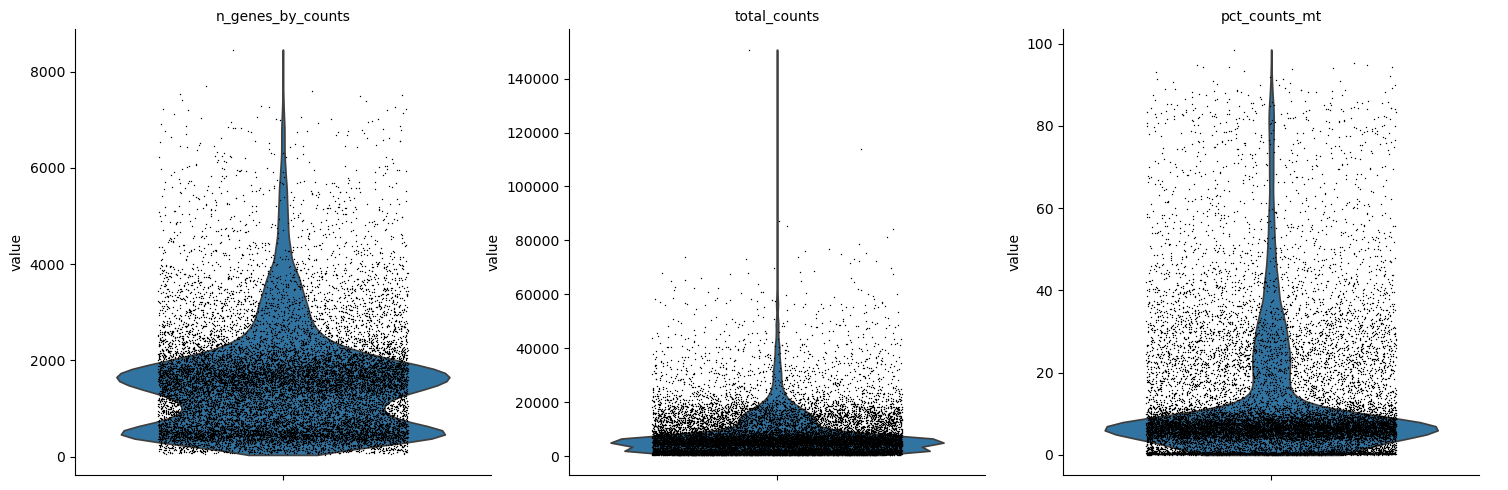

In [32]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
             jitter = 0.3,
             multi_panel = True)

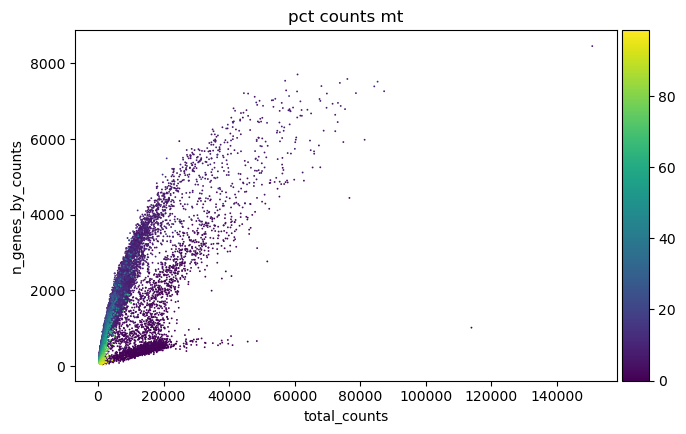

In [35]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [36]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells = 3)

In [37]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [38]:
adata.layers["counts"] = adata.X.copy()

In [39]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

In [40]:
adata.layers["counts"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [41]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [42]:
# note we're not giving out a new dataset, this is all operating in place on adata

sc.pp.normalize_total(adata, target_sum = 10000)
sc.pp.log1p(adata)

In [43]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [45]:
adata.layers["counts"].data

array([ 3.,  1.,  1., ...,  6.,  1., 48.], dtype=float32)

In [46]:
adata.X.data

array([1.495822  , 0.76748186, 0.76748186, ..., 2.2144756 , 0.858422  ,
       4.1934786 ], dtype=float32)

In [47]:
adata.obs["sample"].value_counts()

sample
s1d1    8713
s1d3    8328
Name: count, dtype: int64

In [50]:
# Also important to remove duplicates from the dataset, this will remove cells that have the same barcode

sc.pp.scrublet(adata, batch_key="sample")

In [51]:
import numpy as np
np.__version__

'2.1.3'

In [52]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,...,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,0.023304,False
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,...,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,3912,0.139298,False
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,...,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,0.029787,False
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,...,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4328,0.036113,False
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,...,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,323,0.018668,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,...,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,277,0.088000,False
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,...,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749,3795,0.052632,False
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,...,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482,3087,0.003868,False
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,...,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393,379,0.068257,False


(array([1.4081e+04, 2.0830e+03, 4.0500e+02, 1.7200e+02, 8.0000e+01,
        1.0800e+02, 4.8000e+01, 3.8000e+01, 1.8000e+01, 8.0000e+00]),
 array([0.0020202 , 0.06679514, 0.13157008, 0.19634502, 0.26111996,
        0.32589489, 0.39066983, 0.45544477, 0.52021971, 0.58499465,
        0.64976959]),
 <BarContainer object of 10 artists>)

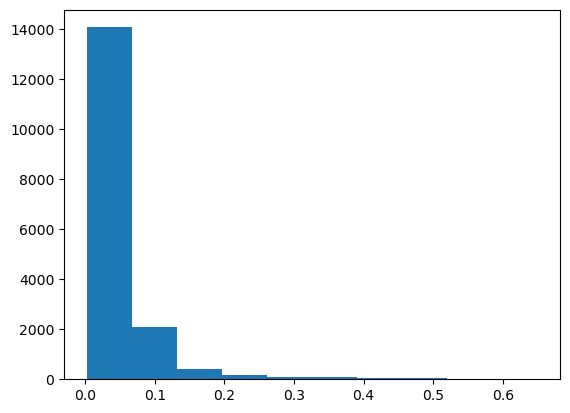

In [56]:
plt.hist(adata.obs["doublet_score"])

In [57]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, batch_key = "sample")

In [58]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,False,False,False,40,0.002336,0.002333,99.766423,40.0,3.713572,40,False,0.003879,1.068160,-0.135804,0,False
AL627309.3,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000294,0.720639,-0.706037,0,False
AL627309.5,False,False,False,155,0.009460,0.009415,99.094891,162.0,5.093750,155,False,0.018172,1.430467,0.457930,0,False
AL627309.4,False,False,False,7,0.000409,0.000409,99.959124,7.0,2.079442,7,False,0.000739,0.791405,-0.591345,0,False
AP006222.2,False,False,False,3,0.000234,0.000234,99.982482,4.0,1.609438,3,False,0.000288,0.324107,-1.352641,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,False,False,False,827,0.063358,0.061432,95.170803,1085.0,6.990256,827,False,0.053558,0.406094,-0.314774,0,False
AC233755.2,False,False,False,10,0.000818,0.000817,99.941606,14.0,2.708050,10,False,0.001516,1.039704,-0.185250,0,False
AC233755.1,False,False,False,45,0.004613,0.004603,99.737226,79.0,4.382027,45,False,0.005400,0.906056,-0.400830,0,False
AC141272.1,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000118,-0.392364,-2.534376,0,False


In [60]:
sc.tl.pca(adata, use_highly_variable=True)

/Users/grevetjd/miniconda3/envs/bootcamp/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [61]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'scrublet', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [62]:
adata.obsm["X_pca"]

array([[-2.8146806 , -2.6065288 , -1.3806992 , ..., -0.45056698,
         0.88624674,  0.31306764],
       [-6.224083  , 11.405789  , -0.7741092 , ...,  0.20772159,
         0.01933331, -0.19952312],
       [-3.400473  , -2.3491604 ,  5.3189874 , ..., -1.402341  ,
        -1.8957244 , -0.44774604],
       ...,
       [12.535098  ,  2.2135398 ,  0.36719352, ..., -0.14365788,
         0.22060399, -0.24051148],
       [ 0.01681362, -0.62306476, -1.3339524 , ...,  0.5823885 ,
         0.05676749,  0.5455052 ],
       [-1.9950123 , -3.113057  , -1.1019591 , ...,  0.5266799 ,
        -0.18579493,  0.79099846]], dtype=float32)

In [63]:
adata.obsm["X_pca"].shape

(17041, 50)

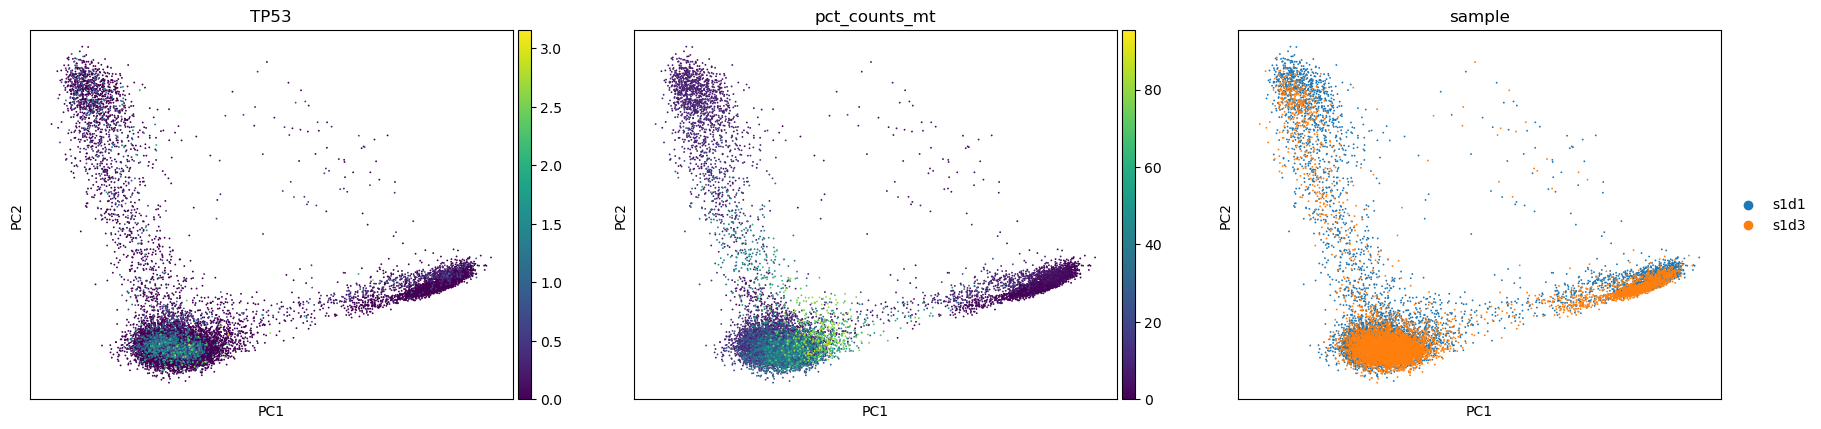

In [75]:
sc.pl.embedding(adata, basis = "pca", color = ["TP53", "pct_counts_mt", "sample"])

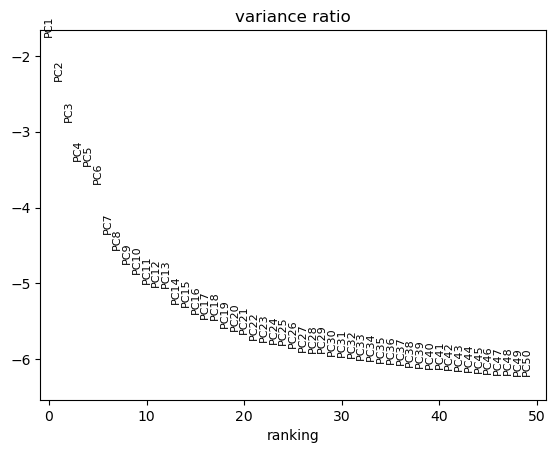

In [73]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [79]:
sc.pp.neighbors(adata)

In [77]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'scrublet', 'hvg', 'pca', 'sample_colors', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [82]:
sc.tl.umap(adata)

In [85]:
top_variable_genes = adata.var[adata.var["highly_variable"]].sort_values("dispersions",
                                                                         ascending = False).index[:5]

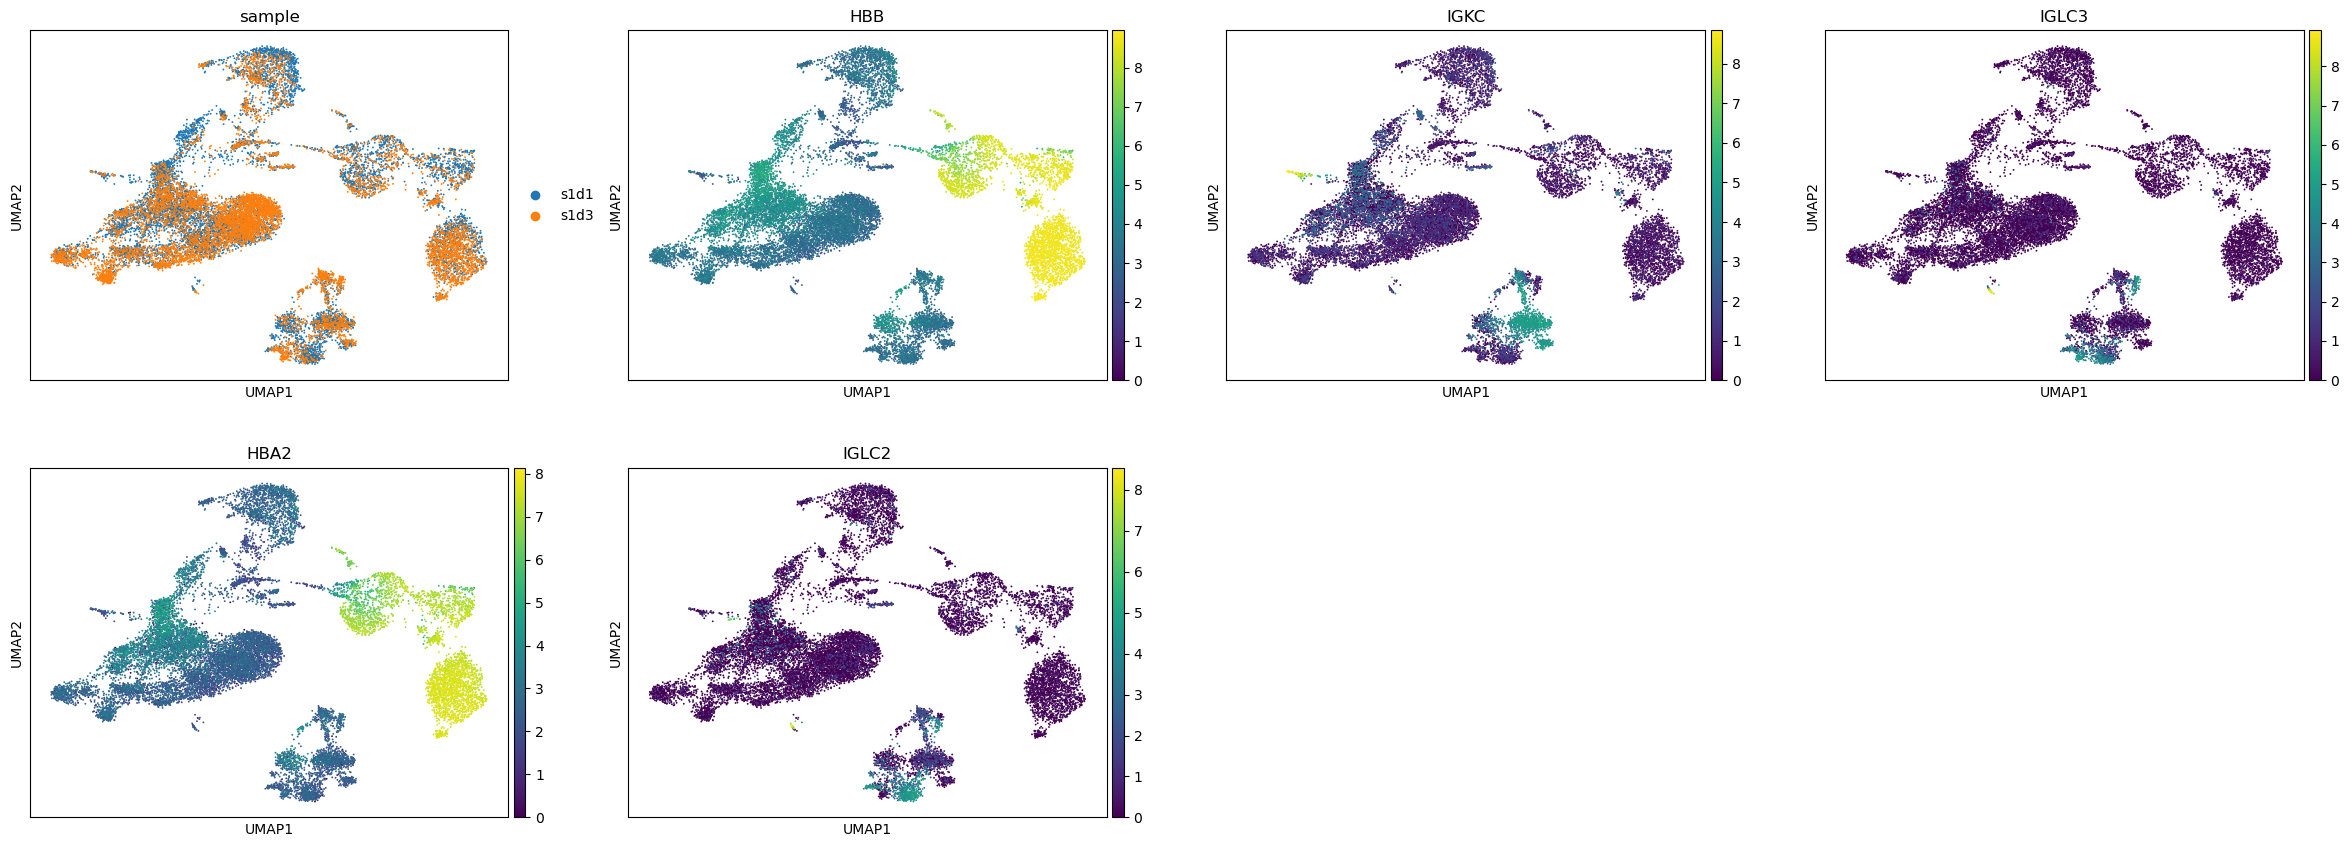

In [87]:
sc.pl.embedding(adata, basis = "umap", color = ["sample"] + list(top_variable_genes))

In [ ]:
resolutions = [1.0, 2.0]
for res in resolutions:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_{res}", )

In [90]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet,leiden_1.0,leiden_2.0
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,...,8.202756,42.133209,17.0,2.890372,0.196237,2103,0.023304,False,3,5
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,...,7.450079,13.374310,58.0,4.077538,0.451257,3912,0.139298,False,4,2
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,...,4.158883,3.862661,13.0,2.639057,0.797057,683,0.029787,False,5,21
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,...,8.278174,22.692417,44.0,3.806663,0.253675,4328,0.036113,False,16,30
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,...,3.295837,4.684685,26.0,3.295837,4.684685,323,0.018668,False,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,...,3.583519,5.691057,20.0,3.044523,3.252032,277,0.088000,False,7,11
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,...,8.293550,30.239067,42.0,3.761200,0.317749,3795,0.052632,False,4,20
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,...,8.178358,13.057184,13145.0,9.483872,48.185482,3087,0.003868,False,11,13
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,...,4.077538,8.309455,39.0,3.688879,5.587393,379,0.068257,False,1,3


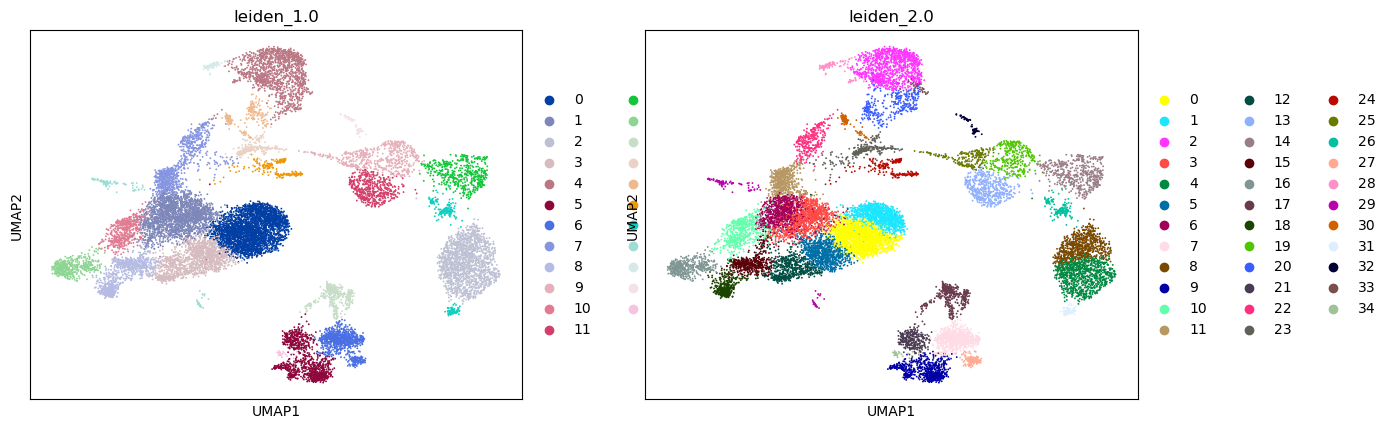

In [93]:
sc.pl.embedding(adata, basis = "umap", color = ["leiden_1.0", "leiden_2.0"])

In [ ]:
# possible cell type annotation: MACA?